# RF

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
file_path_RFL = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_RFL = pd.read_csv(file_path_RFL)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'FSO_Att' in data_RFL.columns:
    data_RFL = data_RFL.drop(['FSO_Att'], axis=1)

filtered_data_RFL = data_RFL

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_RFL= pd.get_dummies(filtered_data_RFL, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_RFL.columns:
    df_RFL['sin_time'] = np.sin(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL['cos_time'] = np.cos(2 * np.pi * df_RFL['Time'] / 24)
    df_RFL.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_RFL


,RFL_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,WindSpeedMin,SYNOPCode_0,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8,sin_time,cos_time
0,6.927868,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,3.007939,1,0,0,0,0,0,0,0.707107,-0.707107
1,4.412096,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,2.537393,1,0,0,0,0,0,0,0.707107,-0.707107
2,6.268740,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,1.640809,1,0,0,0,0,0,0,0.500000,-0.866025
3,4.317853,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,0.886951,1,0,0,0,0,0,0,0.500000,-0.866025
4,6.114514,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,1.874052,1,0,0,0,0,0,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,11.968291,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1,0,0,0,0,0,0,0.866025,0.500000
91375,11.538030,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,0.069834,1,0,0,0,0,0,0,0.866025,0.500000
91376,11.491891,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,0.049824,1,0,0,0,0,0,0,0.866025,0.500000
91377,11.526529,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,0.413146,1,0,0,0,0,0,0,0.965926,0.258819


In [2]:

# Split the FSO data into features and target
X_RFL= df_RFL.drop(['RFL_Att'], axis=1)  # Features for FSO
y_RFL= df_RFL['RFL_Att']  # Target for FSO

In [3]:
# Split the FSO data into training and test sets
X_train_RFL, X_test_RFL, y_train_RFL, y_test_RFL = train_test_split(X_RFL, y_RFL, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_RFL = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_RFL = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_RFL = RandomizedSearchCV(
    estimator=rf_RFL,
    param_distributions=param_distributions_RFL,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_RFL.fit(X_train_RFL, y_train_RFL)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050460F410>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020504613250>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050460ED10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002057ED24550>},
                   random_state=42, verbose=1)

In [4]:
# The best hyperparameters and score for FSO
best_params_RFL = random_search_RFL.best_params_
best_score_RFL= random_search_RFL.best_score_
print(f"Best hyperparameters for FSO: {best_params_RFL}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_RFL}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for FSO: 0.9677404679076529


In [5]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL = pd.DataFrame(X_train_RFL, columns=df_RFL.drop('RFL_Att', axis=1).columns)
train_df_RFL['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL= rank_variables_oob(train_df_RFL, 'RFL_Att', best_params_RFL)
print(rankings_table_RFL)


         Removed Variable     RSMSE       R^2  Remaining Variables
11               sin_time  0.588517  0.970808                   20
15  TemperatureDifference  0.588639  0.970796                   16
10            Particulate  0.588831  0.970777                   21
14         TemperatureMin  0.590404  0.970621                   17
9            WindSpeedMax  0.591060  0.970556                   22
13          VisibilityMax  0.591744  0.970487                   18
7            WindSpeedMin  0.591812  0.970481                   24
8               WindSpeed  0.591918  0.970470                   23
4             SYNOPCode_6  0.593459  0.970316                   27
3             SYNOPCode_5  0.593540  0.970308                   28
2             SYNOPCode_3  0.593594  0.970303                   29
5             SYNOPCode_8  0.593606  0.970301                   26
0             SYNOPCode_4  0.593652  0.970297                   31
1             SYNOPCode_7  0.593983  0.970264                 

In [6]:
FSO_table=rankings_table_RFL
rankings_table_RFL 

,Removed Variable,RSMSE,R^2,Remaining Variables
11,sin_time,0.588517,0.970808,20
15,TemperatureDifference,0.588639,0.970796,16
10,Particulate,0.588831,0.970777,21
14,TemperatureMin,0.590404,0.970621,17
9,WindSpeedMax,0.591060,0.970556,22
13,VisibilityMax,0.591744,0.970487,18
7,WindSpeedMin,0.591812,0.970481,24
8,WindSpeed,0.591918,0.970470,23
4,SYNOPCode_6,0.593459,0.970316,27
3,SYNOPCode_5,0.593540,0.970308,28


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\2577233247.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


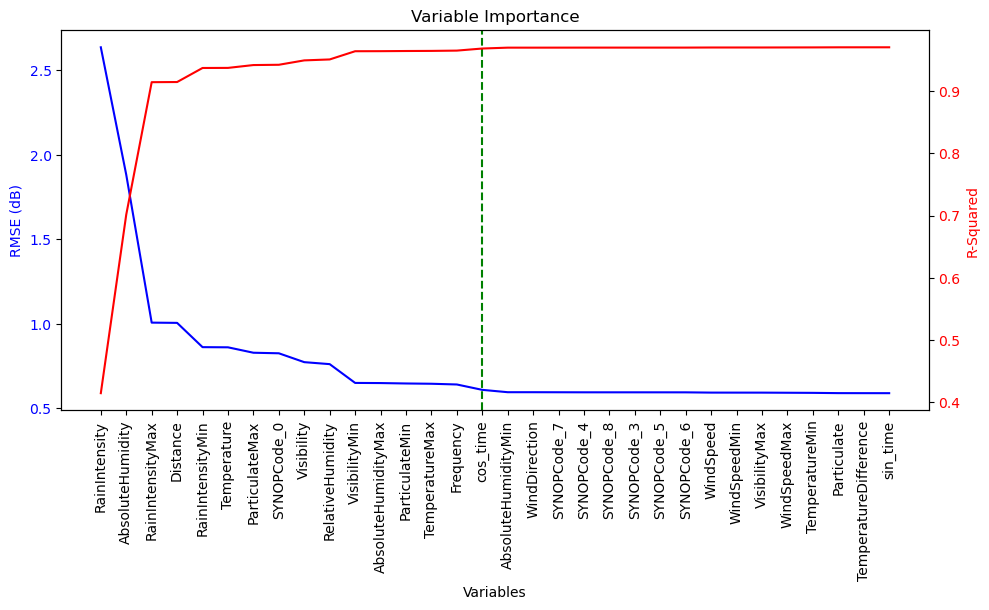

In [7]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_RFL.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [37]:

selected_features_RFL= [
    'VisibilityMax',
    'Frequency',
    'AbsoluteHumidityMax',
    'TemperatureMax',
    'ParticulateMin',
    'VisibilityMin',
    'RelativeHumidity',
    'Visibility',
    'SYNOPCode_0',
    'ParticulateMax',
    'Temperature',
    'Distance',
    'RainIntensityMax',
    'RainIntensityMin',
    'AbsoluteHumidity',
    'RainIntensity'
]

In [38]:
# Select only the chosen features for training and testing
X_train_selected_RFL = X_train_RFL[selected_features_RFL]
X_test_selected_RFL = X_test_RFL[selected_features_RFL]

# Retrain the model with the selected features and best hyperparameters
final_model_RFL= RandomForestRegressor(
    bootstrap=True,
    max_depth=12,
    min_samples_leaf=3,
    min_samples_split=8,
    n_estimators=343,
    oob_score=True,
    random_state=42
)
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_RFL = final_model_RFL.predict(X_test_selected_RFL)

# Calculate RMSE and R-squared on the testing set
test_rmse_RFL= mean_squared_error(y_test_RFL, predictions_RFL, squared=False)
test_r2_RFL = r2_score(y_test_RFL, predictions_RFL)

print(f"Test RMSE: {test_rmse_RFL}")
print(f"Test R^2: {test_r2_RFL}")


Test RMSE: 0.6036929153372522
Test R^2: 0.9689415216934428


# FSO

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import randint

# Assuming the path and CSV file name is correct and accessible.
fso_file_path = r"C:\Users\Pattarawadee\OneDrive\Desktop\Master\Year2\Project A\workspace\RFLFSODataFull.csv"

# Read the FSO CSV file into a DataFrame
data_FSO = pd.read_csv(fso_file_path)

# Prepare FSO_data by dropping RFL attributes if they exist (change the column names accordingly)
if 'RFL_Att' in data_FSO.columns:
    data_FSO = data_FSO.drop(['RFL_Att'], axis=1)

filtered_data_FSO = data_FSO

# Display the filtered DataFrame for FSO


# Prepare the FSO data by dropping the RFL attributes and applying one-hot encoding on the 'SYNOPCode'
df_FSO = pd.get_dummies(filtered_data_FSO, columns=['SYNOPCode'])

# Apply sine and cosine transformations to the 'Time' column if it exists for FSO
if 'Time' in df_FSO.columns:
    df_FSO['sin_time'] = np.sin(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO['cos_time'] = np.cos(2 * np.pi * df_FSO['Time'] / 24)
    df_FSO.drop('Time', axis=1, inplace=True)  # Remove the original Time column


df_FSO


,FSO_Att,AbsoluteHumidity,AbsoluteHumidityMax,AbsoluteHumidityMin,Distance,Frequency,Particulate,ParticulateMax,ParticulateMin,RainIntensity,...,WindSpeedMin,SYNOPCode_0,SYNOPCode_3,SYNOPCode_4,SYNOPCode_5,SYNOPCode_6,SYNOPCode_7,SYNOPCode_8,sin_time,cos_time
0,7.913289,17.595709,17.615907,17.340148,2115.338398,83500000000,0.000000,0.000000,0.000000,0.0,...,3.007939,1,0,0,0,0,0,0,0.707107,-0.707107
1,7.451176,17.549693,17.572415,17.299439,2113.999257,73500000000,0.000000,0.000000,0.000000,0.0,...,2.537393,1,0,0,0,0,0,0,0.707107,-0.707107
2,7.072747,17.290230,17.644014,16.037894,2118.689047,83500000000,0.000000,0.000000,0.000000,0.0,...,1.640809,1,0,0,0,0,0,0,0.500000,-0.866025
3,6.949288,16.820880,17.066776,15.895622,2114.632339,73500000000,0.000000,0.000000,0.000000,0.0,...,0.886951,1,0,0,0,0,0,0,0.500000,-0.866025
4,7.361052,16.813820,17.953974,15.227225,2116.786055,83500000000,0.000000,0.000000,0.000000,0.0,...,1.874052,1,0,0,0,0,0,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91374,9.150012,23.283256,24.142871,22.169805,3970.846129,83500000000,0.000000,0.000000,0.000000,0.0,...,0.000000,1,0,0,0,0,0,0,0.866025,0.500000
91375,9.333777,23.259618,25.104895,21.005496,3969.230652,73500000000,0.000000,0.000000,0.000000,0.0,...,0.069834,1,0,0,0,0,0,0,0.866025,0.500000
91376,8.873168,23.331697,23.996130,22.148649,3968.373512,83500000000,0.000000,0.000000,0.000000,0.0,...,0.049824,1,0,0,0,0,0,0,0.866025,0.500000
91377,9.538886,21.241027,21.624932,20.736391,3967.550165,73500000000,29.693160,30.761540,28.497137,0.0,...,0.413146,1,0,0,0,0,0,0,0.965926,0.258819


In [12]:

# Split the FSO data into features and target
X_FSO = df_FSO.drop(['FSO_Att'], axis=1)  # Features for FSO
y_FSO = df_FSO['FSO_Att']  # Target for FSO

In [13]:
# Split the FSO data into training and test sets
X_train_FSO, X_test_FSO, y_train_FSO, y_test_FSO = train_test_split(X_FSO, y_FSO, test_size=0.3, random_state=42)

# Define the parameter space for RandomizedSearchCV for FSO
param_distributions_FSO = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True],  # Enable bootstrap for FSO
}

# Create a RandomForestRegressor instance with OOB score enabled for FSO
rf_FSO = RandomForestRegressor(random_state=42, oob_score=True)

# Create a RandomizedSearchCV instance for FSO
random_search_FSO = RandomizedSearchCV(
    estimator=rf_FSO,
    param_distributions=param_distributions_FSO,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the RandomizedSearchCV to the FSO training data
random_search_FSO.fit(X_train_FSO, y_train_FSO)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050EAAB1D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050B46F650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050EAC9610>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002050B395750>},
                   random_state=42, verbose=1)

In [14]:
# The best hyperparameters and score for FSO
best_params_FSO = random_search_FSO.best_params_
best_score_FSO = random_search_FSO.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO}")

Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.9273803054693645


In [15]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO = pd.DataFrame(X_train_FSO, columns=df_FSO.drop('FSO_Att', axis=1).columns)
train_df_FSO['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO = rank_variables_oob(train_df_FSO, 'FSO_Att', best_params_FSO)
print(rankings_table_FSO)


         Removed Variable     RSMSE       R^2  Remaining Variables
14              WindSpeed  1.009843  0.933588                   17
13    AbsoluteHumidityMin  1.012654  0.933218                   18
7             SYNOPCode_0  1.017467  0.932582                   24
11          RainIntensity  1.018000  0.932511                   20
10           WindSpeedMin  1.018069  0.932502                   21
9        RainIntensityMax  1.018239  0.932479                   22
8        RainIntensityMin  1.018245  0.932478                   23
12            SYNOPCode_3  1.018601  0.932431                   19
4             SYNOPCode_6  1.019194  0.932353                   27
3             SYNOPCode_7  1.019199  0.932352                   28
6           WindDirection  1.019242  0.932346                   25
5             SYNOPCode_5  1.019379  0.932328                   26
0             SYNOPCode_4  1.019517  0.932310                   31
1             SYNOPCode_8  1.019523  0.932309                 

In [16]:
FSO_table=rankings_table_FSO 
rankings_table_FSO 

,Removed Variable,RSMSE,R^2,Remaining Variables
14,WindSpeed,1.009843,0.933588,17
13,AbsoluteHumidityMin,1.012654,0.933218,18
7,SYNOPCode_0,1.017467,0.932582,24
11,RainIntensity,1.018000,0.932511,20
10,WindSpeedMin,1.018069,0.932502,21
9,RainIntensityMax,1.018239,0.932479,22
8,RainIntensityMin,1.018245,0.932478,23
12,SYNOPCode_3,1.018601,0.932431,19
4,SYNOPCode_6,1.019194,0.932353,27
3,SYNOPCode_7,1.019199,0.932352,28


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\949499461.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)


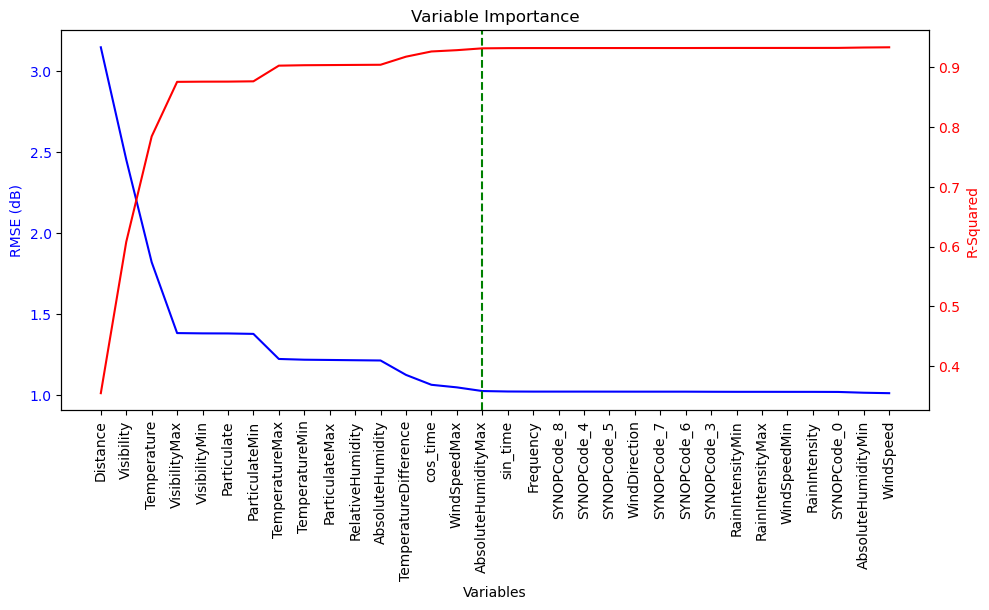

In [17]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 15
cutoff_variable = rankings_table_sorted_FSO.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [18]:
selected_features_FSO = [
    'AbsoluteHumidityMax',
    'WindSpeedMax',
    'cos_time',
    'TemperatureDifference',
    'ParticulateMax',
    'RelativeHumidity',
    'AbsoluteHumidity',
    'TemperatureMax',
    'ParticulateMin',
    'Particulate',
    'VisibilityMin',
    'TemperatureMin',
    'VisibilityMax',
    'Temperature',
    'Visibility',
    'Distance'
]


In [19]:
# Select only the chosen features for training and testing
X_train_selected_FSO = X_train_FSO[selected_features_FSO]
X_test_selected_FSO = X_test_FSO[selected_features_FSO]

# Retrain the model with the selected features and best hyperparameters
final_model_FSO = RandomForestRegressor(
    bootstrap=True,
    max_depth=14,
    min_samples_leaf=9,
    min_samples_split=2,
    n_estimators=158,
    oob_score=True,
    random_state=42
)
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the testing set
predictions_FSO = final_model_FSO.predict(X_test_selected_FSO)

# Calculate RMSE and R-squared on the testing set
test_rmse_FSO = mean_squared_error(y_test_FSO, predictions_FSO, squared=False)
test_r2_FSO = r2_score(y_test_FSO, predictions_FSO)

print(f"Test RMSE: {test_rmse_FSO}")
print(f"Test R^2: {test_r2_FSO}")


Test RMSE: 1.023990072655493
Test R^2: 0.9299383965080189


# Plot

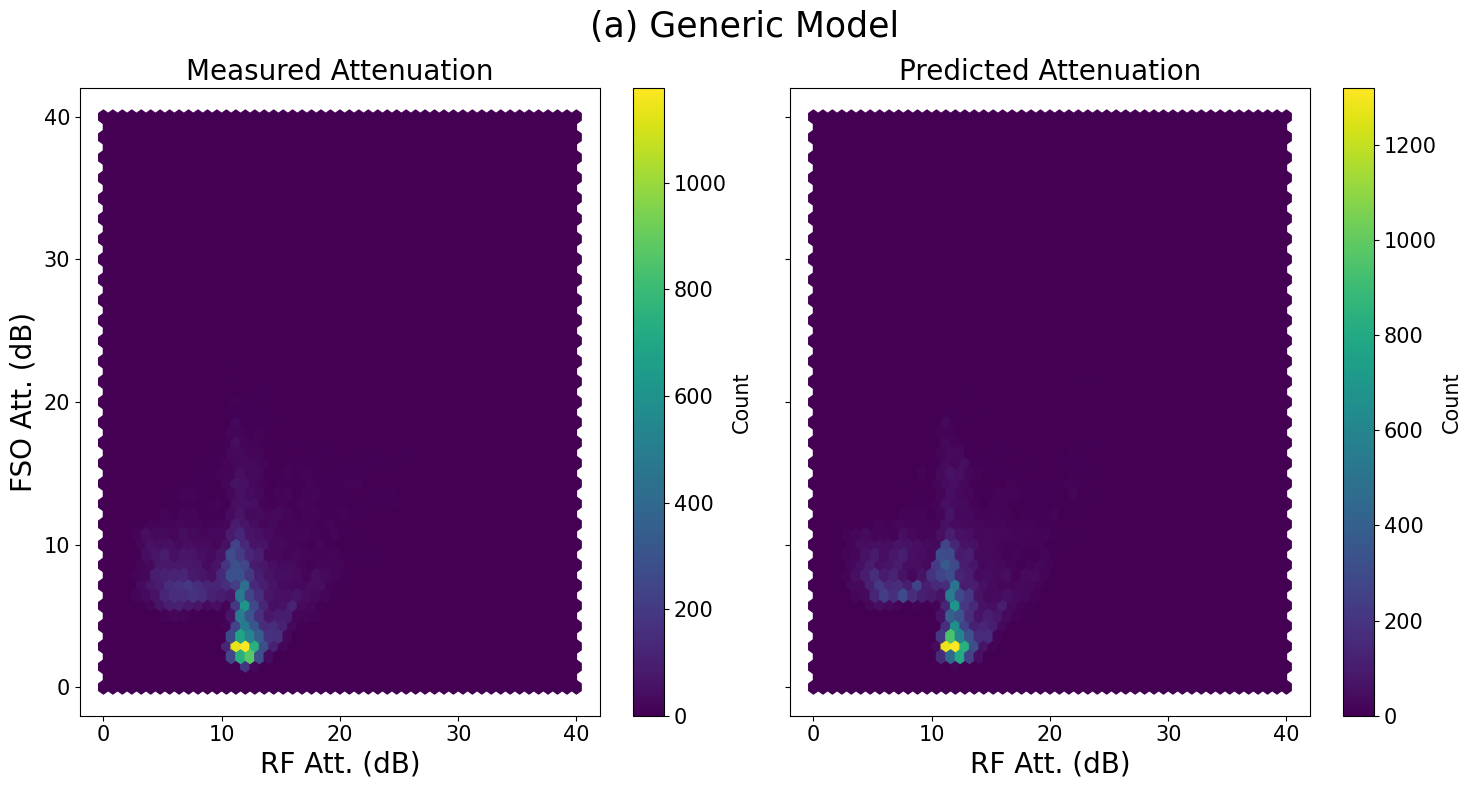

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming these are the numpy arrays you've prepared with your data
measured_attenuation_RFL = np.array(y_test_RFL)
predicted_attenuation_RFL = np.array(predictions_RFL)
measured_attenuation_FSO = np.array(y_test_FSO)
predicted_attenuation_FSO = np.array(predictions_FSO)

# Set up the matplotlib figure (adjust figsize to closely match the aspect ratio of the example image)
fig, ax = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

# Define the extent and ticks for the plots
extent = [0, 40, 0, 40]
ticks = [0, 10, 20, 30, 40]

# Heatmap for Measured FSO Attenuation vs RF Attenuation
hb1 = ax[0].hexbin(measured_attenuation_RFL, measured_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[0].set_title('Measured Attenuation', fontsize=20)
ax[0].set_xlabel('RF Att. (dB)', fontsize=20)
ax[0].set_ylabel('FSO Att. (dB)', fontsize=20)
ax[0].set_xticks(ticks)
ax[0].set_yticks(ticks)
cb1 = fig.colorbar(hb1, ax=ax[0])
cb1.set_label('Count', fontsize=15)

# Heatmap for Predicted FSO Attenuation vs RF Attenuation
hb2 = ax[1].hexbin(predicted_attenuation_RFL, predicted_attenuation_FSO, gridsize=50, cmap='viridis', extent=extent)
ax[1].set_title('Predicted Attenuation', fontsize=20)
ax[1].set_xlabel('RF Att. (dB)', fontsize=20)
ax[1].set_xticks(ticks)
ax[1].set_yticks(ticks)  # This may be redundant since y-axis is shared with the first plot
cb2 = fig.colorbar(hb2, ax=ax[1])
cb2.set_label('Count', fontsize=15)

plt.suptitle('(a) Generic Model',fontsize=25)


ax[0].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
ax[1].tick_params(axis='both', which='major', labelsize=15)  # Modify this for desired size
cb1.ax.tick_params(labelsize=15) 
cb2.ax.tick_params(labelsize=15) 
plt.tight_layout()
plt.show()


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\2345294134.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\2345294134.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)


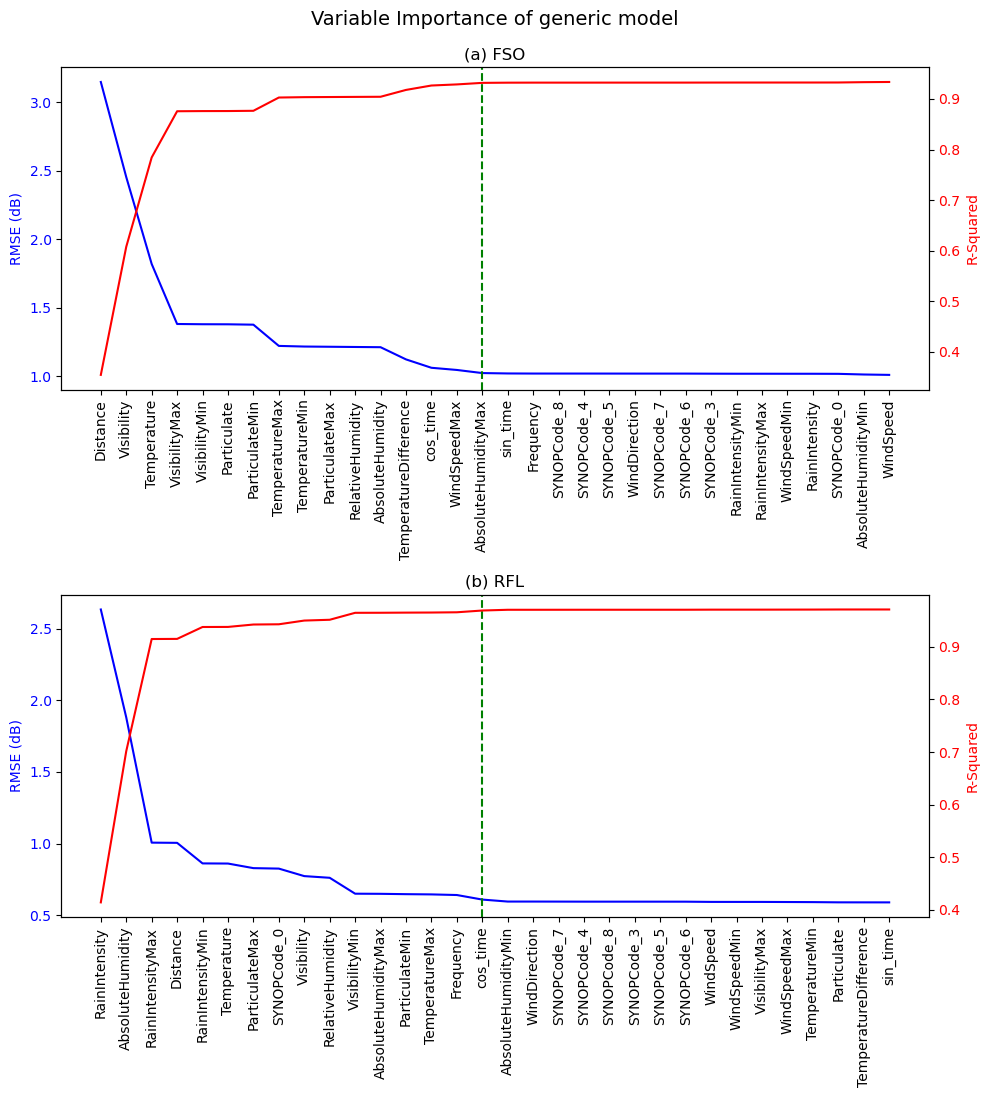

In [22]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO['Removed Variable'], rankings_table_sorted_FSO['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 15  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL['Removed Variable'], rankings_table_sorted_RFL['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 15  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance of generic model', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()


# Method 2 

## train

In [23]:
# Continue from where you've trained the final model on RFL data
final_model_FSO.fit(X_train_selected_FSO, y_train_FSO)

# Generate Predicted RFL Attenuation on the training data
predicted_FSO_train_2 = final_model_FSO.predict(X_train_selected_FSO)
X_train_RFL['Predicted_FSO_Att_2'] = predicted_FSO_train_2  # Enhance the FSO training dataset

# Use final_model_FSO to predict FSO attenuation on the test data
predicted_FSO_test_2 = final_model_FSO.predict(X_test_selected_FSO)
X_test_RFL['Predicted_FSO_Att_2'] = predicted_FSO_test_2


# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_RFL_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_RFL_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_RFL_2 = RandomizedSearchCV(
    estimator=rf_RFL_2,
    param_distributions=param_distributions_RFL_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for FSO
random_search_RFL_2.fit(X_train_RFL, y_train_RFL)  

# Retrieve and apply the best hyperparameters
best_params_RFL_2 = random_search_RFL_2.best_params_
best_score_RFL_2 = random_search_RFL_2.best_score_
print(f"Best hyperparameters for RFL: {best_params_RFL_2}")
print(f"Best OOB score from RandomizedSearchCV for RFL: {best_score_RFL_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for RFL: {'bootstrap': True, 'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 343}
Best OOB score from RandomizedSearchCV for RFL: 0.9682338232870489


In [24]:
# Use the rank_variables_oob function and pass in the best_params_RFL
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_RFL_2 = pd.DataFrame(X_train_RFL, columns=X_train_RFL.columns)
train_df_RFL_2['RFL_Att'] = y_train_RFL

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_RFL_2= rank_variables_oob(train_df_RFL_2, 'RFL_Att', best_params_RFL_2)
print(rankings_table_RFL_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
13               cos_time  0.585569  0.971100                   19
12          VisibilityMax  0.585969  0.971061                   20
10            Particulate  0.588636  0.970797                   22
11    AbsoluteHumidityMin  0.588701  0.970790                   21
9            WindSpeedMax  0.589804  0.970681                   23
8               WindSpeed  0.590302  0.970631                   24
7            WindSpeedMin  0.590691  0.970592                   25
0             SYNOPCode_4  0.591689  0.970493                   32
3             SYNOPCode_5  0.591747  0.970487                   29
2             SYNOPCode_3  0.591763  0.970486                   30
1             SYNOPCode_7  0.591919  0.970470                   31
4             SYNOPCode_6  0.591994  0.970463                   28
6           WindDirection  0.592078  0.970454                   26
5             SYNOPCode_8  0.592208  0.970441                 

In [25]:
rankings_table_RFL_2

,Removed Variable,RSMSE,R^2,Remaining Variables
13,cos_time,0.585569,0.971100,19
12,VisibilityMax,0.585969,0.971061,20
10,Particulate,0.588636,0.970797,22
11,AbsoluteHumidityMin,0.588701,0.970790,21
9,WindSpeedMax,0.589804,0.970681,23
8,WindSpeed,0.590302,0.970631,24
7,WindSpeedMin,0.590691,0.970592,25
0,SYNOPCode_4,0.591689,0.970493,32
3,SYNOPCode_5,0.591747,0.970487,29
2,SYNOPCode_3,0.591763,0.970486,30


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\3706510421.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


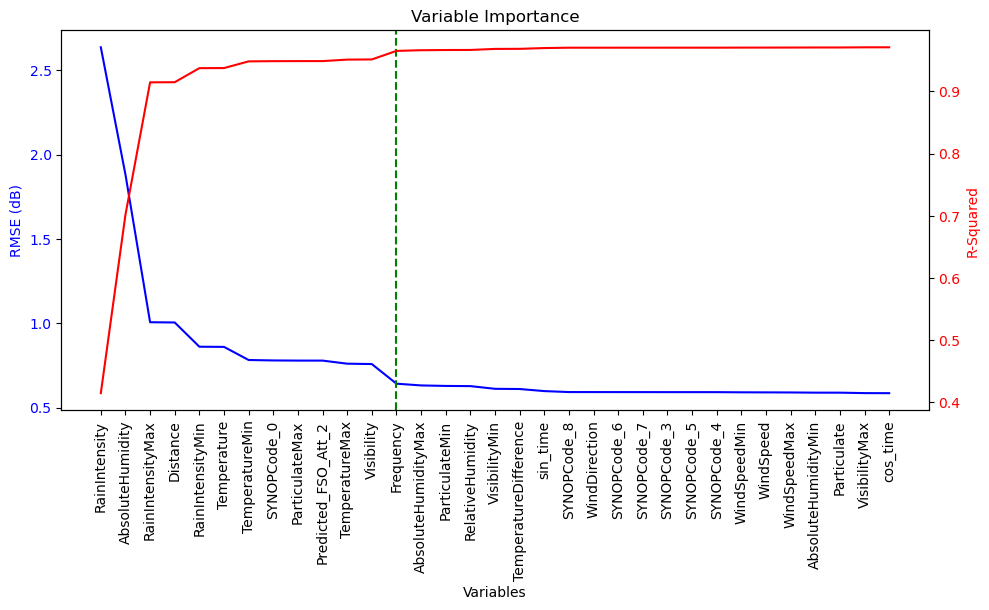

In [26]:
import matplotlib.pyplot as plt

rankings_table_sorted_RFL_2 = rankings_table_RFL_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 12
cutoff_variable = rankings_table_sorted_RFL_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [27]:
selected_features_RFL_2= [
    
    'Frequency',
    'Visibility',
    'TemperatureMax',
    'Predicted_FSO_Att_2',
    'ParticulateMax',
    'SYNOPCode_0',
    'TemperatureMin',
    'Temperature',
    'RainIntensityMin',
    'Distance',
    'RainIntensityMax',
    'AbsoluteHumidity',
    'RainIntensity'
    
    
]
# Select only the chosen features for training and testing
X_train_selected_RFL_2 = X_train_RFL[selected_features_RFL_2]
X_test_selected_RFL_2 = X_test_RFL[selected_features_RFL_2]


## Test

In [28]:
final_model_RFL_2 = RandomForestRegressor(
    n_estimators=best_params_RFL_2['n_estimators'],
    max_depth=best_params_RFL_2['max_depth'],
    min_samples_split=best_params_RFL_2['min_samples_split'],
    min_samples_leaf=best_params_RFL_2['min_samples_leaf'],
    bootstrap=best_params_RFL_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_RFL_2.fit(X_train_selected_RFL_2, y_train_RFL)

RandomForestRegressor(max_depth=12, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=343, oob_score=True, random_state=42)

In [29]:

# Now, predict RFL on the enhanced test data
predicted_RFL_test_2 = final_model_RFL_2.predict(X_test_selected_RFL_2)

# Calculate RMSE and R^2 for the test data to evaluate the RFL model
test_rmse_RFL_2 = mean_squared_error(y_test_RFL, predicted_RFL_test_2, squared=False)
test_r2_RFL_2 = r2_score(y_test_RFL, predicted_RFL_test_2)

print(f"Test RMSE for RFL: {test_rmse_RFL_2}")
print(f"Test R^2 for RFL: {test_r2_RFL_2}")


Test RMSE for RFL: 0.6399997998041415
Test R^2 for RFL: 0.965093388557066


# Method 3 (FSO)

## train

In [30]:
# Continue from where you've trained the final model on RFL data
final_model_RFL.fit(X_train_selected_RFL, y_train_RFL)

# Generate Predicted RFL Attenuation on the training data
predicted_RFL_train_2 = final_model_RFL.predict(X_train_selected_RFL)
X_train_FSO['Predicted_RFL_Att_2'] = predicted_RFL_train_2  
# Use final_model_RFL to predict RFL attenuation on the test data
predicted_RFL_test_2 = final_model_RFL.predict(X_test_selected_RFL)
# Enhance the FSO test dataset with these predictions
X_test_FSO['Predicted_RFL_Att_2'] = predicted_RFL_test_2

# Define the parameter space and optimize parameters for a new RandomForest model
param_distributions_FSO_2 = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Enable bootstrap
}
rf_FSO_2 = RandomForestRegressor(random_state=42, oob_score=True)
random_search_FSO_2 = RandomizedSearchCV(
    estimator=rf_FSO_2,
    param_distributions=param_distributions_FSO_2,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
# Make sure to use the correct training data and labels for RFL
random_search_FSO_2.fit(X_train_FSO, y_train_FSO)  # Note: Using X_train_RFL not X_train_FSO

# Retrieve and apply the best hyperparameters
best_params_FSO_2 = random_search_FSO_2.best_params_
best_score_FSO_2 = random_search_FSO_2.best_score_
print(f"Best hyperparameters for FSO: {best_params_FSO_2}")
print(f"Best OOB score from RandomizedSearchCV for FSO: {best_score_FSO_2}")



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters for FSO: {'bootstrap': True, 'max_depth': 14, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 158}
Best OOB score from RandomizedSearchCV for FSO: 0.9265209305774105


In [31]:
# Use the rank_variables_oob function and pass in the best_params_FSO
def rank_variables_oob(df, target_column, best_params):
    variables = [col for col in df.columns if col != target_column]
    initial_variables = variables.copy()  # Store the initial variables
    rankings = []
    
    for _ in range(len(initial_variables)):
        # Train the model with the remaining variables
        rf = RandomForestRegressor(oob_score=True, random_state=42, **best_params)
        rf.fit(df[variables], df[target_column])

        # Calculate OOB RSMSE and R^2
        oob_predictions = rf.oob_prediction_
        rsmse = mean_squared_error(df[target_column], oob_predictions, squared=False)
        rsquare = r2_score(df[target_column], oob_predictions)
        
        # Get feature importances and find the least important feature
        importances = rf.feature_importances_
        least_important_idx = np.argmin(importances)
        least_important_var = variables.pop(least_important_idx)
        
        # Record the performance and the variable that was removed
        rankings.append({
            'Removed Variable': least_important_var,
            'RSMSE': rsmse,
            'R^2': rsquare,
            'Remaining Variables': len(variables)
        })

    # Convert rankings to DataFrame and return
    rankings_df = pd.DataFrame(rankings)
    return rankings_df.sort_values(by='R^2', ascending=False)

# Prepare your FSO training data
train_df_FSO_2 = pd.DataFrame(X_train_FSO, columns=X_train_FSO.columns)
train_df_FSO_2['FSO_Att'] = y_train_FSO

# Call the rank_variables_oob function with the FSO training data and the best hyperparameters
rankings_table_FSO_2 = rank_variables_oob(train_df_FSO_2, 'FSO_Att', best_params_FSO_2)
print(rankings_table_FSO_2)


         Removed Variable     RSMSE       R^2  Remaining Variables
15              WindSpeed  1.027528  0.931242                   17
14    AbsoluteHumidityMax  1.029296  0.931005                   18
7             SYNOPCode_0  1.030260  0.930876                   25
8             SYNOPCode_5  1.030738  0.930811                   24
10       RainIntensityMax  1.030929  0.930786                   22
11          RainIntensity  1.031031  0.930772                   21
13    AbsoluteHumidityMin  1.031263  0.930741                   19
9        RainIntensityMin  1.031392  0.930724                   23
12           WindSpeedMin  1.031399  0.930723                   20
6           WindDirection  1.031451  0.930716                   26
4             SYNOPCode_6  1.031905  0.930655                   28
5             SYNOPCode_3  1.032125  0.930625                   27
3             SYNOPCode_7  1.032126  0.930625                   29
2               Frequency  1.032248  0.930609                 

In [32]:
rankings_table_FSO_2

,Removed Variable,RSMSE,R^2,Remaining Variables
15,WindSpeed,1.027528,0.931242,17
14,AbsoluteHumidityMax,1.029296,0.931005,18
7,SYNOPCode_0,1.030260,0.930876,25
8,SYNOPCode_5,1.030738,0.930811,24
10,RainIntensityMax,1.030929,0.930786,22
11,RainIntensity,1.031031,0.930772,21
13,AbsoluteHumidityMin,1.031263,0.930741,19
9,RainIntensityMin,1.031392,0.930724,23
12,WindSpeedMin,1.031399,0.930723,20
6,WindDirection,1.031451,0.930716,26


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\3156411496.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)


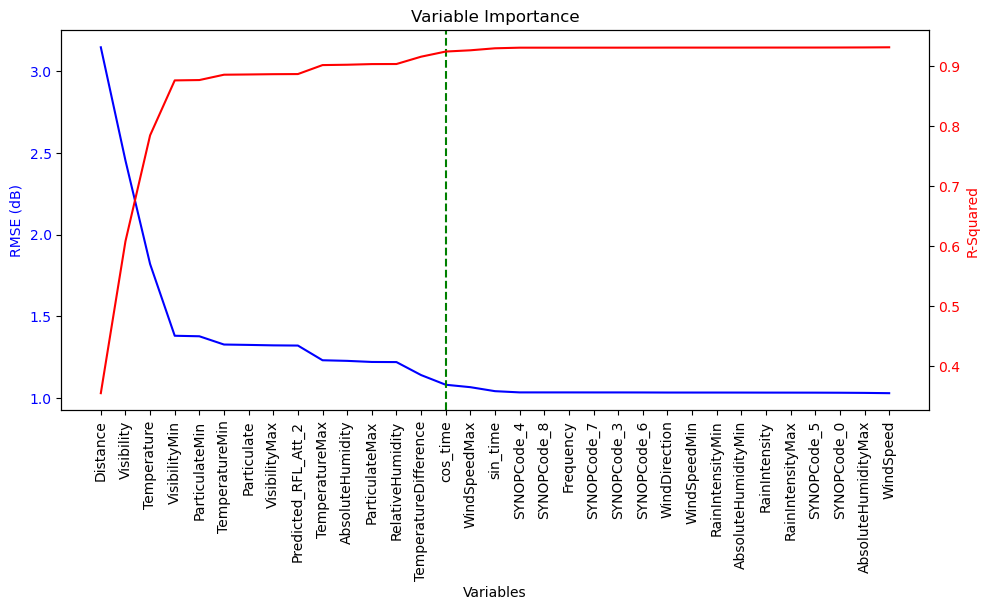

In [33]:
import matplotlib.pyplot as plt

rankings_table_sorted_FSO_2 = rankings_table_FSO_2.iloc[::-1].reset_index(drop=True)


# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# RMSE plot (left y-axis)
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_xlabel('Variables')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO_2['Removed Variable'], rotation=90)

# R^2 plot (right y-axis)
ax2 = ax1.twinx()
ax2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax2.set_ylabel('R-Squared', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
# Assuming we know the cutoff index; for example, let's say it's 10
cutoff_index = 14
cutoff_variable = rankings_table_sorted_FSO_2.loc[cutoff_index, 'Removed Variable']
ax1.axvline(x=cutoff_variable, color='g', linestyle='--')

fig.tight_layout()  # For better spacing
plt.title('Variable Importance')
plt.show()


In [34]:
selected_features_FSO_2 = [
    'cos_time',
    'TemperatureDifference',
    'RelativeHumidity',
    'ParticulateMax',
    'AbsoluteHumidity',
    'TemperatureMax',
    'Predicted_RFL_Att_2',
    'VisibilityMax',
    'Particulate',
    'TemperatureMin',
    'ParticulateMin',
    'VisibilityMin',
    'Temperature',
    'Visibility',
    'Distance'
]
# Select only the chosen features for training and testing
X_train_selected_FSO_2 = X_train_FSO[selected_features_FSO_2]
X_test_selected_FSO_2 = X_test_FSO[selected_features_FSO_2]


## Testing

In [35]:
final_model_FSO_2 = RandomForestRegressor(
    n_estimators=best_params_FSO_2['n_estimators'],
    max_depth=best_params_FSO_2['max_depth'],
    min_samples_split=best_params_FSO_2['min_samples_split'],
    min_samples_leaf=best_params_FSO_2['min_samples_leaf'],
    bootstrap=best_params_FSO_2['bootstrap'],
    random_state=42,
    oob_score=True
)
# Train the final model with the best parameters
final_model_FSO_2.fit(X_train_selected_FSO_2, y_train_FSO)


RandomForestRegressor(max_depth=14, min_samples_leaf=9, n_estimators=158,
                      oob_score=True, random_state=42)

In [36]:
# Use RF2 to predict FSO attenuation on the enhanced test data
predicted_FSO_2 = final_model_FSO_2.predict(X_test_selected_FSO_2)

# Calculate RMSE and R-squared on the FSO test data to evaluate RF2
test_rmse_FSO_2 = mean_squared_error(y_test_FSO, predicted_FSO_2, squared=False)
test_r2_FSO_2 = r2_score(y_test_FSO, predicted_FSO_2)

print(f"Test RMSE for FSO: {test_rmse_FSO_2}")
print(f"Test R^2 for FSO: {test_r2_FSO_2}")


Test RMSE for FSO: 1.0638691881718603
Test R^2 for FSO: 0.9243750601522058


In [42]:
# prompt: Create a function for crosstab frequency table for y_test_FSO and y_test_RFL that can specify bin size ie. bin_size = 1 mean to get frequency from 0 <= y < 1,  1 <= y < 2, .... until this range cover the max value of both y_test_FSO  and y_test_RFL

import pandas as pd
import numpy as np
def crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size):
  """
  Creates a crosstab frequency table for y_test_FSO and y_test_RFL with specified bin size.

  Args:
      y_test_FSO: Pandas Series containing the FSO attenuation values.
      y_test_RFL: Pandas Series containing the RFL attenuation values.
      bin_size: Integer specifying the size of the bins.

  Returns:
      Pandas DataFrame representing the crosstab frequency table.
  """

  # Determine the maximum value of both y_test_FSO and y_test_RFL
  max_value = max(y_test_FSO.max(), y_test_RFL.max())

  # Create bins based on the bin size
  bins = np.arange(0, max_value + bin_size, bin_size)


  # Digitize the data into bins, setting right=False to make bins [low, high)
  y_test_FSO_bins = pd.cut(y_test_FSO, bins=bins, right=False, include_lowest=True)
  y_test_RFL_bins = pd.cut(y_test_RFL, bins=bins, right=False, include_lowest=True)

  # Create the crosstab frequency table
  crosstab = pd.crosstab(y_test_FSO_bins, y_test_RFL_bins)

  return crosstab

import pandas as pd
import numpy as np

def mutual_information(crosstab):
    """
    Calculate and normalize the mutual information from a crosstab frequency table.

    Args:
        crosstab: Pandas DataFrame representing the crosstab frequency table.

    Returns:
        float representing the normalized mutual information.
    """
    total = crosstab.to_numpy().sum()
    P_xy = crosstab / total  # Joint probability distribution
    P_x = P_xy.sum(axis=1)   # Marginal probability distribution of X
    P_y = P_xy.sum(axis=0)   # Marginal probability distribution of Y

    # Calculate entropies
    H_x = -np.sum(P_x * np.log(P_x + 1e-15))  # add a small number to avoid log(0)
    H_y = -np.sum(P_y * np.log(P_y + 1e-15))
    H_xy = -np.sum(P_xy.values * np.log(P_xy.values + 1e-15))

    I_xy = H_x + H_y - H_xy  # Mutual information

    # Normalizing mutual information between 0 and 1
    min_H = min(H_x, H_y)
    if min_H > 0:
        normalized_I_xy = I_xy / min_H
    else:
        normalized_I_xy = 0

    return normalized_I_xy

In [65]:
print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(y_test_FSO, y_test_RFL)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(y_test_FSO, y_test_RFL, bin_size=0.0295)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
0.08728215334067287
Normalized Mutual Information: 0.33999581013808583
10


In [66]:


print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(predicted_FSO_2, predicted_RFL_test_2)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(predicted_FSO_2, predicted_RFL_test_2, bin_size=0.003958)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
0.08909876581969695
Normalized Mutual Information: 0.6883270933124921
8


In [63]:

print("Pearson correlation between y_test_FSO and y_test_RFL:")
print(np.corrcoef(predictions_FSO, predictions_RFL)[0, 1])
#Assuming y_test_FSO and y_test_RFL are defined and filled with data
crosstab = crosstab_frequency_table(predictions_FSO, predictions_RFL, bin_size=0.0039)
mi = mutual_information(crosstab)
print("Normalized Mutual Information:", mi)
print(crosstab.max().max())

Pearson correlation between y_test_FSO and y_test_RFL:
0.0800843230639344
Normalized Mutual Information: 0.6915585060903188
9


C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\128968370.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
C:\Users\Pattarawadee\AppData\Local\Temp\ipykernel_16104\128968370.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)


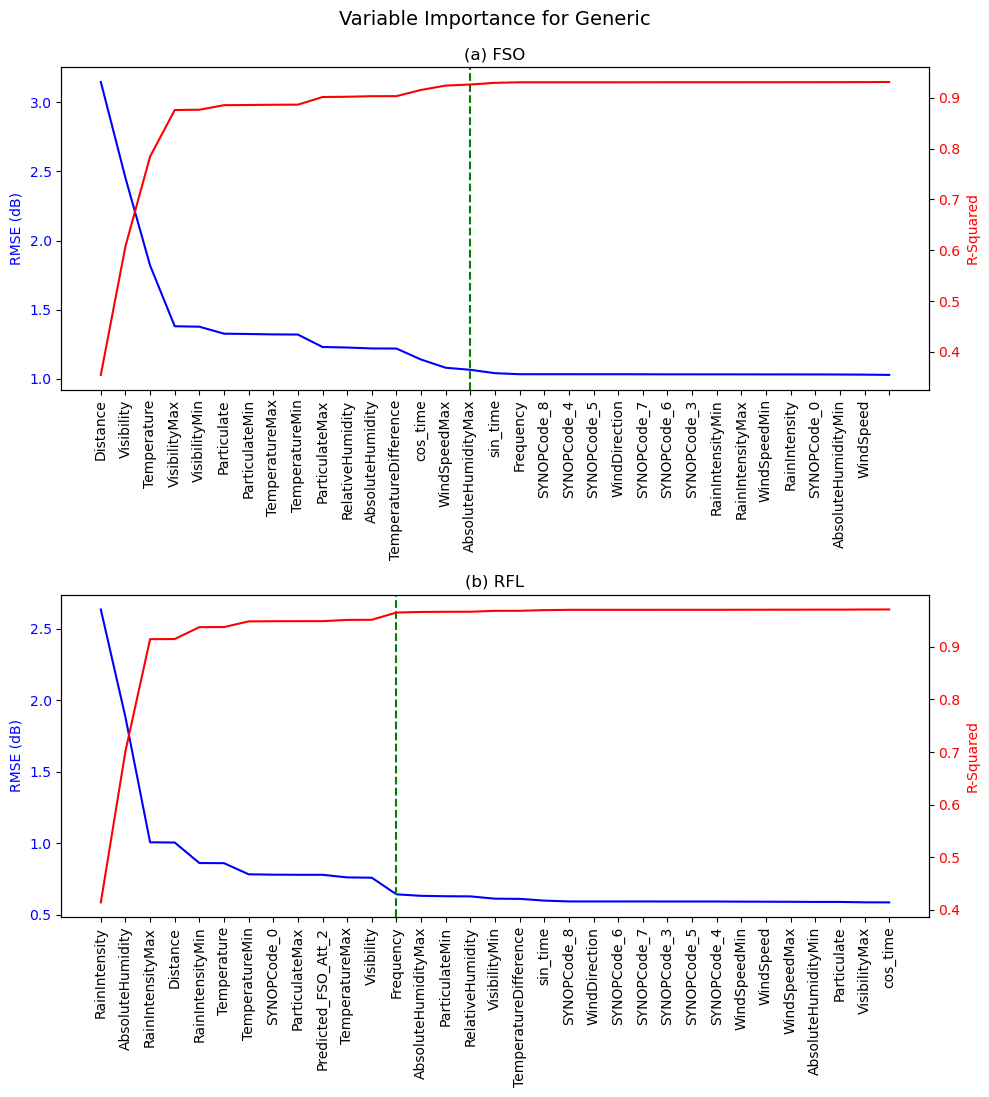

In [68]:
import matplotlib.pyplot as plt

# Sorting rankings table for RFL
rankings_table_sorted_RFL = rankings_table_RFL.iloc[::-1].reset_index(drop=True)

# Sorting rankings table for FSO
rankings_table_sorted_FSO = rankings_table_FSO.iloc[::-1].reset_index(drop=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Creating subplots with FSO on top and RFL at the bottom

# Plot for FSO
ax1.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['RSMSE'], 'b-', label='RMSE (dB)')
ax1.set_ylabel('RMSE (dB)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(rankings_table_sorted_FSO['Removed Variable'], rotation=90)
ax1.set_title('(a) FSO')  # Updated title to reflect the position change

ax1_2 = ax1.twinx()
ax1_2.plot(rankings_table_sorted_FSO_2['Removed Variable'], rankings_table_sorted_FSO_2['R^2'], 'r-', label='R-Squared')
ax1_2.set_ylabel('R-Squared', color='r')
ax1_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_FSO = 15  # Assuming we know the cutoff index
cutoff_variable_FSO = rankings_table_sorted_FSO_2.loc[cutoff_index_FSO, 'Removed Variable']
ax1.axvline(x=cutoff_variable_FSO, color='g', linestyle='--')

# Plot for RFL
ax2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['RSMSE'], 'b-', label='RMSE (dB)')
ax2.set_ylabel('RMSE (dB)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_xticklabels(rankings_table_sorted_RFL_2['Removed Variable'], rotation=90)
ax2.set_title('(b) RFL')  # Updated title to reflect the position change

ax2_2 = ax2.twinx()
ax2_2.plot(rankings_table_sorted_RFL_2['Removed Variable'], rankings_table_sorted_RFL_2['R^2'], 'r-', label='R-Squared')
ax2_2.set_ylabel('R-Squared', color='r')
ax2_2.tick_params(axis='y', labelcolor='r')

# Green dotted line for cutoff
cutoff_index_RFL = 12  # Assuming we know the cutoff index
cutoff_variable_RFL = rankings_table_sorted_RFL_2.loc[cutoff_index_RFL, 'Removed Variable']
ax2.axvline(x=cutoff_variable_RFL, color='g', linestyle='--')

# Title
fig.suptitle('Variable Importance for Generic', x=0.5, y=0.94, fontsize=14, ha='center')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # For better spacing and accommodating the title
plt.show()
